In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
import os

In [ ]:
from tqdm import tqdm
import time

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dir_path = '/content/gdrive/My Drive/BTP/data'

Read Files

In [ ]:
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep='\t', header=None)

In [ ]:
#Pressure Files
pressureFile1 = get_files(dir_path=dir_path, filename='PS1.txt')
pressureFile2 = get_files(dir_path=dir_path, filename='PS2.txt')
pressureFile3 = get_files(dir_path=dir_path, filename='PS3.txt')
pressureFile4 = get_files(dir_path=dir_path, filename='PS4.txt')
pressureFile5 = get_files(dir_path=dir_path, filename='PS5.txt')
pressureFile6 = get_files(dir_path=dir_path, filename='PS6.txt')

In [ ]:
profile = get_files(dir_path=dir_path, filename='profile.txt')

In [ ]:
#Temp Files
temperature1 = get_files(dir_path=dir_path, filename='TS1.txt')
temperature2 = get_files(dir_path=dir_path, filename='TS2.txt')
temperature3 = get_files(dir_path=dir_path, filename='TS3.txt')
temperature4 = get_files(dir_path=dir_path, filename='TS4.txt')

In [ ]:
#Volume Files
volumeFlow1 = get_files(dir_path=dir_path, filename='FS1.txt')
volumeFlow2 = get_files(dir_path=dir_path, filename='FS2.txt')

In [ ]:
pressureFile1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5960,5961,5962,5963,5964,5965,5966,5967,5968,5969,5970,5971,5972,5973,5974,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,154.42,155.14,155.75,156.20,156.87,157.57,158.06,158.59,159.27,159.92,160.51,161.17,161.88,162.44,162.98,163.70,164.41,164.99,165.69,166.45,167.09,167.75,168.53,169.31,169.91,170.54,171.31,172.06,172.73,173.56,...,151.11,151.12,151.19,151.19,151.06,151.02,151.03,151.01,151.10,151.17,151.06,150.95,151.03,151.08,151.08,151.14,151.09,150.98,150.98,151.06,151.08,151.08,151.13,151.06,151.04,151.14,151.12,151.03,151.12,151.22,151.16,151.19,151.25,151.16,151.10,151.16,151.14,151.10,151.21,151.19
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,153.88,154.43,154.88,155.31,155.90,156.44,156.90,157.38,157.90,158.35,158.77,159.31,159.87,160.35,160.89,161.42,161.93,162.44,163.03,163.63,164.04,164.56,165.14,165.66,166.26,166.94,167.44,167.91,168.55,169.20,...,150.91,150.88,150.81,150.88,150.90,150.87,150.89,150.89,150.86,150.86,150.92,150.78,150.74,150.84,150.80,150.71,150.79,150.84,150.80,150.90,151.00,150.88,150.82,150.84,150.73,150.78,150.90,150.84,150.77,150.82,150.82,150.82,150.86,150.80,150.73,150.79,150.84,150.79,150.80,150.86
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,153.56,154.00,154.56,155.09,155.63,156.20,156.68,157.09,157.63,158.19,158.64,159.18,159.77,160.13,160.63,161.31,161.82,162.29,162.79,163.24,163.77,164.34,164.91,165.43,165.94,166.54,167.15,167.67,168.25,168.93,...,150.60,150.48,150.44,150.49,150.54,150.54,150.55,150.52,150.44,150.43,150.44,150.44,150.47,150.49,150.46,150.44,150.54,150.55,150.52,150.52,150.50,150.47,150.57,150.54,150.44,150.50,150.60,150.50,150.46,150.54,150.49,150.44,150.47,150.46,150.38,150.47,150.50,150.43,150.54,150.62
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,153.26,153.74,154.24,154.66,155.20,155.77,156.22,156.68,157.16,157.65,158.10,158.66,159.24,159.64,160.13,160.75,161.25,161.73,162.34,162.88,163.28,163.84,164.46,164.95,165.51,166.13,166.64,167.13,167.77,168.42,...,150.25,150.28,150.24,150.23,150.31,150.30,150.22,150.27,150.31,150.27,150.34,150.36,150.25,150.20,150.28,150.30,150.26,150.31,150.27,150.17,150.23,150.31,150.31,150.28,150.26,150.19,150.22,150.38,150.38,150.31,150.34,150.30,150.28,150.38,150.41,150.33,150.31,150.31,150.25,150.28
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,153.09,153.46,154.02,154.56,154.97,155.45,155.98,156.44,156.95,157.48,157.94,158.36,158.88,159.48,159.98,160.45,161.01,161.50,162.01,162.59,163.19,163.68,164.15,164.75,165.31,165.84,166.52,167.13,167.54,168.05,...,150.14,150.22,150.13,150.08,150.16,150.09,150.09,150.24,150.19,150.12,150.16,150.22,150.19,150.20,150.27,150.22,150.28,150.31,150.34,150.23,150.23,150.26,150.19,150.33,150.25,150.15,150.24,150.33,150.34,150.34,150.31,150.20,150.17,150.28,150.31,150.25,150.27,150.22,150.13,150.19


In [ ]:
temperature1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,35.172,35.168,35.156,35.187,35.176,35.250,35.234,35.316,35.316,35.402,35.402,35.398,35.441,35.414,35.434,35.480,35.500,35.488,35.559,35.555,35.574,35.652,35.668,35.664,35.660,35.734,35.824,35.824,35.820,35.836,35.836,35.828,35.840,35.859,35.918,35.914,35.895,35.992,35.980,35.980,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,35.648,35.734,35.828,35.848,35.902,36.035,36.078,36.199,36.246,36.301,36.398,36.473,36.500,36.555,36.652,36.645,36.664,36.652,36.738,36.715,36.797,36.797,36.891,36.902,36.898,36.984,36.984,37.062,37.051,37.145,37.141,37.172,37.164,37.164,37.152,37.238,37.234,37.305,37.305,37.324,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,36.887,36.887,36.980,37.059,37.137,37.230,37.316,37.398,37.477,37.582,37.578,37.723,37.730,37.730,37.797,37.898,37.980,37.977,37.984,38.016,38.031,38.047,38.117,38.125,38.195,38.219,38.207,38.289,38.301,38.281,38.367,38.379,38.379,38.379,38.379,38.375,38.367,38.391,38.391,38.469,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,37.887,37.902,37.965,38.047,38.180,38.203,38.367,38.406,38.457,38.629,38.633,38.699,38.801,38.801,38.828,38.902,38.895,38.969,38.988,39.055,39.055,39.055,39.055,39.121,39.215,39.215,39.219,39.227,39.273,39.285,39.293,39.293,39.273,39.285,39.375,39.359,39.375,39.379,39.367,39.363,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,38.809,38.789,38.883,38.965,39.047,39.121,39.234,39.281,39.453,39.461,39.488,39.633,39.723,39.719,39.711,39.801,39.879,39.867,39.883,39.973,39.973,39.961,40.047,40.133,40.047,40.133,40.145,40.230,40.219,40.219,40.305,40.297,40.285,40.309,40.281,40.309,40.391,40.348,40.320,40.336,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391


In [ ]:
volumeFlow1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,0.001,0.005,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.005,0.003,0.000,0.001,0.001,0.003,0.001,0.003,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.003,0.003,0.0,...,7.904,7.703,7.917,7.902,7.846,7.881,7.737,8.046,7.775,7.730,8.006,7.864,7.859,7.911,7.739,8.004,7.857,7.684,7.971,7.829,7.907,7.885,7.680,7.980,7.890,7.744,7.927,7.795,7.908,7.919,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,0.008,0.000,0.001,0.003,0.004,0.000,0.001,0.004,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.003,0.000,0.000,0.000,0.001,0.001,0.001,0.003,0.001,0.003,0.008,0.0,...,7.933,7.791,7.915,7.928,7.802,7.975,7.776,8.029,7.946,7.875,7.913,7.723,8.009,7.869,7.980,7.939,7.758,7.908,7.772,7.999,7.926,7.862,7.899,7.724,7.946,7.860,7.986,7.888,7.714,7.965,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,0.000,0.001,0.001,0.003,0.001,0.001,0.001,0.004,0.004,0.003,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.003,0.001,0.000,0.000,0.004,0.001,0.003,0.001,0.000,0.003,0.001,0.000,0.0,...,8.000,7.768,8.058,7.918,7.751,7.902,7.781,7.910,7.759,7.999,7.854,7.959,7.867,7.873,7.857,7.777,7.959,7.778,8.051,7.907,7.994,7.892,7.796,7.888,7.678,7.861,7.835,8.016,7.878,7.994,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.003,0.003,0.001,0.001,0.006,0.000,0.004,0.001,0.001,0.006,0.000,0.001,0.003,0.005,0.000,0.000,0.0,...,7.831,7.943,7.778,7.869,7.762,7.956,7.772,7.966,7.758,7.934,7.936,7.976,7.890,7.909,7.826,7.718,7.917,7.817,7.927,7.791,7.862,7.848,7.990,7.834,7.953,7.941,7.882,7.835,7.779,7.938,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,0.001,0.001,0.000,0.001,0.005,0.000,0.000,0.000,0.001,0.000,0.001,0.003,0.005,0.001,0.001,0.000,0.001,0.001,0.003,0.001,0.000,0.003,0.003,0.001,0.001,0.001,0.000,0.000,0.000,0.0,...,7.808,7.706,7.976,7.688,7.909,7.816,7.777,7.748,7.992,7.786,7.875,7.779,7.951,7.819,8.072,7.806,7.929,7.873,7.875,7.887,7.844,7.884,7.756,7.902,7.673,7.921,7.731,8.001,7.702,8.022,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825


In [ ]:
#pump efficiency, vibrations, cooling efficiency, coolin power, efficiency factor files
pump1 = get_files(dir_path=dir_path, filename='EPS1.txt')
vibration1 = get_files(dir_path=dir_path, filename='VS1.txt')
coolingE1 = get_files(dir_path=dir_path, filename='CE.txt')
coolingP1 = get_files(dir_path=dir_path, filename='CP.txt')
effFactor1 = get_files(dir_path=dir_path, filename='SE.txt')

In [ ]:
y_coolerCondition = pd.DataFrame(profile.iloc[:, 0])
y_valveCondition = pd.DataFrame(profile.iloc[:, 1])
y_pumpLeak = pd.DataFrame(profile.iloc[:, 2])
y_hydraulicAcc = pd.DataFrame(profile.iloc[:, 3])
y_stableFlag = pd.DataFrame(profile.iloc[:, 4])

Feature Extraction

In [ ]:
def max_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.max(axis = 1)
    return df1

In [ ]:
def min_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.min(axis = 1)
    return df1

In [ ]:
#average the cycle data

def mean_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.mean(axis = 1)
    return df1

In [ ]:
def std_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.std(axis = 1)
    return df1

In [ ]:
def rms_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ((np.power(df,2)).sum(axis=1))/df.count(axis=1)
    return df1

In [ ]:
def kur_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.kurtosis(axis = 1)
    return df1

In [ ]:
def ske_conversion(df): 
    df1 = pd.DataFrame()
    df1 = df.skew(axis = 1)
    return df1

In [ ]:
def cre_conversion(df): 
    df1 = pd.DataFrame()
    df1 = (np.absolute(df.max(axis = 1)))/(((np.power(df,2)).sum(axis = 1))/df.count(axis = 1))
    return df1

In [ ]:
def cle_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ((np.absolute(df)).max(axis = 1))/np.power((((np.power((np.absolute(df)),0.5)).sum(axis = 1))/df.count(axis = 1)),2)
    return df1

In [ ]:
def sha_conversion(df): 
    df1 = pd.DataFrame()
    df1 = ( np.power( ( (( np.power(df,2) ).sum(axis = 1)) /df.count(axis = 1)) ,2)) /df.mean(axis = 1)
    return df1

In [ ]:
def imp_conversion(df): 
    df1 = pd.DataFrame()
    a= (np.absolute(df)).max(axis = 1)
    b = ( (np.absolute(df)).sum(axis = 1) ) / (df.count(axis = 1))
    df1 = a / b
    return df1

In [ ]:
PS2_max = pd.DataFrame(max_conversion(pressureFile2))
PS2_max.columns = ['PS2_max']

PS1_max = pd.DataFrame(max_conversion(pressureFile2))
PS1_max.columns = ['PS1_max']

PS3_max = pd.DataFrame(max_conversion(pressureFile3))
PS3_max.columns = ['PS3_max']

PS4_max = pd.DataFrame(max_conversion(pressureFile4))
PS4_max.columns = ['PS4_max']

PS5_max = pd.DataFrame(max_conversion(pressureFile5))
PS5_max.columns = ['PS5_max']

PS6_max = pd.DataFrame(max_conversion(pressureFile6))
PS6_max.columns = ['PS6_max']

FS1_max = pd.DataFrame(max_conversion(volumeFlow1))
FS1_max.columns = ['FS1_max']

FS2_max = pd.DataFrame(max_conversion(volumeFlow2))
FS2_max.columns = ['FS2_max']

TS1_max = pd.DataFrame(max_conversion(temperature1))
TS1_max.columns = ['TS1_max']

TS2_max = pd.DataFrame(max_conversion(temperature2))
TS2_max.columns = ['TS2_max']

TS3_max = pd.DataFrame(max_conversion(temperature3))
TS3_max.columns = ['TS3_max']

TS4_max = pd.DataFrame(max_conversion(temperature4))
TS4_max.columns = ['TS4_max']

EPS1_max = pd.DataFrame(max_conversion(pump1))
EPS1_max.columns = ['EPS1_max']

VS1_max = pd.DataFrame(max_conversion(vibration1))
VS1_max.columns = ['VS1_max']

CE_max = pd.DataFrame(max_conversion(coolingE1))
CE_max.columns = ['CE_max']

CP_max = pd.DataFrame(max_conversion(coolingP1))
CP_max.columns = ['CP_max']

SE_max = pd.DataFrame(max_conversion(effFactor1))
SE_max.columns = ['SE_max']

In [ ]:
PS2_min = pd.DataFrame(min_conversion(pressureFile2))
PS2_min.columns = ['PS2_min']

PS1_min = pd.DataFrame(min_conversion(pressureFile2))
PS1_min.columns = ['PS1_min']

PS3_min = pd.DataFrame(min_conversion(pressureFile3))
PS3_min.columns = ['PS3_min']

PS4_min = pd.DataFrame(min_conversion(pressureFile4))
PS4_min.columns = ['PS4_min']

PS5_min = pd.DataFrame(min_conversion(pressureFile5))
PS5_min.columns = ['PS5_min']

PS6_min = pd.DataFrame(min_conversion(pressureFile6))
PS6_min.columns = ['PS6_max']

FS1_min = pd.DataFrame(min_conversion(volumeFlow1))
FS1_min.columns = ['FS1_min']

FS2_min = pd.DataFrame(min_conversion(volumeFlow2))
FS2_min.columns = ['FS2_min']

TS1_min = pd.DataFrame(min_conversion(temperature1))
TS1_min.columns = ['TS1_min']

TS2_min = pd.DataFrame(min_conversion(temperature2))
TS2_min.columns = ['TS2_min']

TS3_min = pd.DataFrame(min_conversion(temperature3))
TS3_min.columns = ['TS3_min']

TS4_min = pd.DataFrame(min_conversion(temperature4))
TS4_min.columns = ['TS4_min']

EPS1_min = pd.DataFrame(min_conversion(pump1))
EPS1_min.columns = ['EPS1_min']

VS1_min = pd.DataFrame(min_conversion(vibration1))
VS1_min.columns = ['VS1_min']

CE_min = pd.DataFrame(min_conversion(coolingE1))
CE_min.columns = ['CE_min']

CP_min = pd.DataFrame(min_conversion(coolingP1))
CP_min.columns = ['CP_min']

SE_min = pd.DataFrame(min_conversion(effFactor1))
SE_min.columns = ['SE_min']

In [ ]:
PS2_std = pd.DataFrame(std_conversion(pressureFile2))
PS2_std.columns = ['PS2_std']

PS1_std = pd.DataFrame(std_conversion(pressureFile2))
PS1_std.columns = ['PS1_std']

PS3_std = pd.DataFrame(std_conversion(pressureFile3))
PS3_std.columns = ['PS3_std']

PS4_std = pd.DataFrame(std_conversion(pressureFile4))
PS4_std.columns = ['PS4_std']

PS5_std = pd.DataFrame(std_conversion(pressureFile5))
PS5_std.columns = ['PS5_std']

PS6_std = pd.DataFrame(std_conversion(pressureFile6))
PS6_std.columns = ['PS6_std']

FS1_std = pd.DataFrame(std_conversion(volumeFlow1))
FS1_std.columns = ['FS1_std']

FS2_std = pd.DataFrame(std_conversion(volumeFlow2))
FS2_std.columns = ['FS2_std']

TS1_std = pd.DataFrame(std_conversion(temperature1))
TS1_std.columns = ['TS1_std']

TS2_std = pd.DataFrame(std_conversion(temperature2))
TS2_std.columns = ['TS2_std']

TS3_std = pd.DataFrame(std_conversion(temperature3))
TS3_std.columns = ['TS3_std']

TS4_std = pd.DataFrame(std_conversion(temperature4))
TS4_std.columns = ['TS4_std']

EPS1_std = pd.DataFrame(std_conversion(pump1))
EPS1_std.columns = ['EPS1_std']

VS1_std = pd.DataFrame(std_conversion(vibration1))
VS1_std.columns = ['VS1_std']

CE_std = pd.DataFrame(std_conversion(coolingE1))
CE_std.columns = ['CE_std']

CP_std = pd.DataFrame(std_conversion(coolingP1))
CP_std.columns = ['CP_std']

SE_std = pd.DataFrame(std_conversion(effFactor1))
SE_std.columns = ['SE_std']

In [ ]:
PS2_rms = pd.DataFrame(rms_conversion(pressureFile2))
PS2_rms.columns = ['PS2_rms']

PS1_rms = pd.DataFrame(rms_conversion(pressureFile2))
PS1_rms.columns = ['PS1_rms']

PS3_rms = pd.DataFrame(rms_conversion(pressureFile3))
PS3_rms.columns = ['PS3_rms']

PS4_rms = pd.DataFrame(rms_conversion(pressureFile4))
PS4_rms.columns = ['PS4_rms']

PS5_rms = pd.DataFrame(rms_conversion(pressureFile5))
PS5_rms.columns = ['PS5_rms']

PS6_rms = pd.DataFrame(rms_conversion(pressureFile6))
PS6_rms.columns = ['PS6_rms']

FS1_rms = pd.DataFrame(rms_conversion(volumeFlow1))
FS1_rms.columns = ['FS1_rms']

FS2_rms = pd.DataFrame(rms_conversion(volumeFlow2))
FS2_rms.columns = ['FS2_rms']

TS1_rms = pd.DataFrame(rms_conversion(temperature1))
TS1_rms.columns = ['TS1_rms']

TS2_rms = pd.DataFrame(rms_conversion(temperature2))
TS2_rms.columns = ['TS2_rms']

TS3_rms = pd.DataFrame(rms_conversion(temperature3))
TS3_rms.columns = ['TS3_rms']

TS4_rms = pd.DataFrame(rms_conversion(temperature4))
TS4_rms.columns = ['TS4_rms']

EPS1_rms = pd.DataFrame(rms_conversion(pump1))
EPS1_rms.columns = ['EPS1_rms']

VS1_rms = pd.DataFrame(rms_conversion(vibration1))
VS1_rms.columns = ['VS1_rms']

CE_rms = pd.DataFrame(rms_conversion(coolingE1))
CE_rms.columns = ['CE_rms']

CP_rms = pd.DataFrame(rms_conversion(coolingP1))
CP_rms.columns = ['CP_rms']

SE_rms = pd.DataFrame(rms_conversion(effFactor1))
SE_rms.columns = ['SE_rms']

In [ ]:
PS2_kur = pd.DataFrame(kur_conversion(pressureFile2))
PS2_kur.columns = ['PS2_kur']

PS1_kur = pd.DataFrame(kur_conversion(pressureFile2))
PS1_kur.columns = ['PS1_kur']

PS3_kur = pd.DataFrame(kur_conversion(pressureFile3))
PS3_kur.columns = ['PS3_kur']

PS4_kur = pd.DataFrame(kur_conversion(pressureFile4))
PS4_kur.columns = ['PS4_kur']

PS5_kur = pd.DataFrame(kur_conversion(pressureFile5))
PS5_kur.columns = ['PS5_kur']

PS6_kur = pd.DataFrame(kur_conversion(pressureFile6))
PS6_kur.columns = ['PS6_kur']

FS1_kur = pd.DataFrame(kur_conversion(volumeFlow1))
FS1_kur.columns = ['FS1_kur']

FS2_kur = pd.DataFrame(kur_conversion(volumeFlow2))
FS2_kur.columns = ['FS2_kur']

TS1_kur = pd.DataFrame(kur_conversion(temperature1))
TS1_kur.columns = ['TS1_kur']

TS2_kur = pd.DataFrame(kur_conversion(temperature2))
TS2_kur.columns = ['TS2_kur']

TS3_kur = pd.DataFrame(kur_conversion(temperature3))
TS3_kur.columns = ['TS3_kur']

TS4_kur = pd.DataFrame(kur_conversion(temperature4))
TS4_kur.columns = ['TS4_kur']

EPS1_kur = pd.DataFrame(kur_conversion(pump1))
EPS1_kur.columns = ['EPS1_kur']

VS1_kur = pd.DataFrame(kur_conversion(vibration1))
VS1_kur.columns = ['VS1_kur']

CE_kur = pd.DataFrame(kur_conversion(coolingE1))
CE_kur.columns = ['CE_kur']

CP_kur = pd.DataFrame(kur_conversion(coolingP1))
CP_kur.columns = ['CP_kur']

SE_kur = pd.DataFrame(kur_conversion(effFactor1))
SE_kur.columns = ['SE_kur']

In [ ]:
PS2_ske = pd.DataFrame(ske_conversion(pressureFile2))
PS2_ske.columns = ['PS2_ske']

PS1_ske = pd.DataFrame(ske_conversion(pressureFile2))
PS1_ske.columns = ['PS1_ske']

PS3_ske = pd.DataFrame(ske_conversion(pressureFile3))
PS3_ske.columns = ['PS3_ske']

PS4_ske = pd.DataFrame(ske_conversion(pressureFile4))
PS4_ske.columns = ['PS4_ske']

PS5_ske = pd.DataFrame(ske_conversion(pressureFile5))
PS5_ske.columns = ['PS5_ske']

PS6_ske = pd.DataFrame(ske_conversion(pressureFile6))
PS6_ske.columns = ['PS6_ske']

FS1_ske = pd.DataFrame(ske_conversion(volumeFlow1))
FS1_ske.columns = ['FS1_ske']

FS2_ske = pd.DataFrame(ske_conversion(volumeFlow2))
FS2_ske.columns = ['FS2_ske']

TS1_ske = pd.DataFrame(ske_conversion(temperature1))
TS1_ske.columns = ['TS1_ske']

TS2_ske = pd.DataFrame(ske_conversion(temperature2))
TS2_ske.columns = ['TS2_ske']

TS3_ske = pd.DataFrame(ske_conversion(temperature3))
TS3_ske.columns = ['TS3_ske']

TS4_ske = pd.DataFrame(ske_conversion(temperature4))
TS4_ske.columns = ['TS4_ske']

EPS1_ske = pd.DataFrame(ske_conversion(pump1))
EPS1_ske.columns = ['EPS1_ske']

VS1_ske = pd.DataFrame(ske_conversion(vibration1))
VS1_ske.columns = ['VS1_ske']

CE_ske = pd.DataFrame(ske_conversion(coolingE1))
CE_ske.columns = ['CE_ske']

CP_ske = pd.DataFrame(ske_conversion(coolingP1))
CP_ske.columns = ['CP_ske']

SE_ske = pd.DataFrame(ske_conversion(effFactor1))
SE_ske.columns = ['SE_ske']

In [ ]:
PS2_cre = pd.DataFrame(cre_conversion(pressureFile2))
PS2_cre.columns = ['PS2_cre']

PS1_cre = pd.DataFrame(cre_conversion(pressureFile2))
PS1_cre.columns = ['PS1_cre']

PS3_cre = pd.DataFrame(cre_conversion(pressureFile3))
PS3_cre.columns = ['PS3_cre']

PS4_cre = pd.DataFrame(cre_conversion(pressureFile4))
PS4_cre.columns = ['PS4_cre']

PS5_cre = pd.DataFrame(cre_conversion(pressureFile5))
PS5_cre.columns = ['PS5_cre']

PS6_cre = pd.DataFrame(cre_conversion(pressureFile6))
PS6_cre.columns = ['PS6_cre']

FS1_cre = pd.DataFrame(cre_conversion(volumeFlow1))
FS1_cre.columns = ['FS1_cre']

FS2_cre = pd.DataFrame(cre_conversion(volumeFlow2))
FS2_cre.columns = ['FS2_cre']

TS1_cre = pd.DataFrame(cre_conversion(temperature1))
TS1_cre.columns = ['TS1_cre']

TS2_cre = pd.DataFrame(cre_conversion(temperature2))
TS2_cre.columns = ['TS2_cre']

TS3_cre = pd.DataFrame(cre_conversion(temperature3))
TS3_cre.columns = ['TS3_cre']

TS4_cre = pd.DataFrame(cre_conversion(temperature4))
TS4_cre.columns = ['TS4_cre']

EPS1_cre = pd.DataFrame(cre_conversion(pump1))
EPS1_cre.columns = ['EPS1_cre']

VS1_cre = pd.DataFrame(cre_conversion(vibration1))
VS1_cre.columns = ['VS1_cre']

CE_cre = pd.DataFrame(cre_conversion(coolingE1))
CE_cre.columns = ['CE_cre']

CP_cre = pd.DataFrame(cre_conversion(coolingP1))
CP_cre.columns = ['CP_cre']

SE_cre = pd.DataFrame(cre_conversion(effFactor1))
SE_cre.columns = ['SE_cre']

In [ ]:
PS2_cle = pd.DataFrame(cle_conversion(pressureFile2))
PS2_cle.columns = ['PS2_cle']

PS1_cle = pd.DataFrame(cle_conversion(pressureFile2))
PS1_cle.columns = ['PS1_cle']

PS3_cle = pd.DataFrame(cle_conversion(pressureFile3))
PS3_cle.columns = ['PS3_cle']

PS4_cle = pd.DataFrame(cle_conversion(pressureFile4))
PS4_cle.columns = ['PS4_cle']

PS5_cle = pd.DataFrame(cle_conversion(pressureFile5))
PS5_cle.columns = ['PS5_cle']

PS6_cle = pd.DataFrame(cle_conversion(pressureFile6))
PS6_cle.columns = ['PS6_cle']

FS1_cle = pd.DataFrame(cle_conversion(volumeFlow1))
FS1_cle.columns = ['FS1_cle']

FS2_cle = pd.DataFrame(cle_conversion(volumeFlow2))
FS2_cle.columns = ['FS2_cle']

TS1_cle = pd.DataFrame(cle_conversion(temperature1))
TS1_cle.columns = ['TS1_cle']

TS2_cle = pd.DataFrame(cle_conversion(temperature2))
TS2_cle.columns = ['TS2_cle']

TS3_cle = pd.DataFrame(cle_conversion(temperature3))
TS3_cle.columns = ['TS3_cle']

TS4_cle = pd.DataFrame(cle_conversion(temperature4))
TS4_cle.columns = ['TS4_cle']

EPS1_cle = pd.DataFrame(cle_conversion(pump1))
EPS1_cle.columns = ['EPS1_cle']

VS1_cle = pd.DataFrame(cle_conversion(vibration1))
VS1_cle.columns = ['VS1_cle']

CE_cle = pd.DataFrame(cle_conversion(coolingE1))
CE_cle.columns = ['CE_cle']

CP_cle = pd.DataFrame(cle_conversion(coolingP1))
CP_cle.columns = ['CP_cle']

SE_cle = pd.DataFrame(cle_conversion(effFactor1))
SE_cle.columns = ['SE_cle']

In [ ]:
PS2_sha = pd.DataFrame(sha_conversion(pressureFile2))
PS2_sha.columns = ['PS2_sha']

PS1_sha = pd.DataFrame(sha_conversion(pressureFile2))
PS1_sha.columns = ['PS1_sha']

PS3_sha = pd.DataFrame(sha_conversion(pressureFile3))
PS3_sha.columns = ['PS3_sha']

PS4_sha = pd.DataFrame(sha_conversion(pressureFile4))
PS4_sha.columns = ['PS4_sha']

PS5_sha = pd.DataFrame(sha_conversion(pressureFile5))
PS5_sha.columns = ['PS5_sha']

PS6_sha = pd.DataFrame(sha_conversion(pressureFile6))
PS6_sha.columns = ['PS6_sha']

FS1_sha = pd.DataFrame(sha_conversion(volumeFlow1))
FS1_sha.columns = ['FS1_sha']

FS2_sha = pd.DataFrame(sha_conversion(volumeFlow2))
FS2_sha.columns = ['FS2_sha']

TS1_sha = pd.DataFrame(sha_conversion(temperature1))
TS1_sha.columns = ['TS1_sha']

TS2_sha = pd.DataFrame(sha_conversion(temperature2))
TS2_sha.columns = ['TS2_sha']

TS3_sha = pd.DataFrame(sha_conversion(temperature3))
TS3_sha.columns = ['TS3_sha']

TS4_sha = pd.DataFrame(sha_conversion(temperature4))
TS4_sha.columns = ['TS4_sha']

EPS1_sha = pd.DataFrame(sha_conversion(pump1))
EPS1_sha.columns = ['EPS1_sha']

VS1_sha = pd.DataFrame(sha_conversion(vibration1))
VS1_sha.columns = ['VS1_sha']

CE_sha = pd.DataFrame(sha_conversion(coolingE1))
CE_sha.columns = ['CE_sha']

CP_sha = pd.DataFrame(sha_conversion(coolingP1))
CP_sha.columns = ['CP_sha']

SE_sha = pd.DataFrame(sha_conversion(effFactor1))
SE_sha.columns = ['SE_sha']

In [ ]:
PS2_imp = pd.DataFrame(imp_conversion(pressureFile2))
PS2_imp.columns = ['PS2_imp']

PS1_imp = pd.DataFrame(imp_conversion(pressureFile2))
PS1_imp.columns = ['PS1_imp']

PS3_imp = pd.DataFrame(imp_conversion(pressureFile3))
PS3_imp.columns = ['PS3_imp']

PS4_imp = pd.DataFrame(imp_conversion(pressureFile4))
PS4_imp.columns = ['PS4_imp']

PS5_imp = pd.DataFrame(imp_conversion(pressureFile5))
PS5_imp.columns = ['PS5_imp']

PS6_imp = pd.DataFrame(imp_conversion(pressureFile6))
PS6_imp.columns = ['PS6_imp']

FS1_imp = pd.DataFrame(imp_conversion(volumeFlow1))
FS1_imp.columns = ['FS1_imp']

FS2_imp = pd.DataFrame(imp_conversion(volumeFlow2))
FS2_imp.columns = ['FS2_imp']

TS1_imp = pd.DataFrame(imp_conversion(temperature1))
TS1_imp.columns = ['TS1_imp']

TS2_imp = pd.DataFrame(imp_conversion(temperature2))
TS2_imp.columns = ['TS2_imp']

TS3_imp = pd.DataFrame(imp_conversion(temperature3))
TS3_imp.columns = ['TS3_imp']

TS4_imp = pd.DataFrame(imp_conversion(temperature4))
TS4_imp.columns = ['TS4_imp']

EPS1_imp = pd.DataFrame(imp_conversion(pump1))
EPS1_imp.columns = ['EPS1_imp']

VS1_imp = pd.DataFrame(imp_conversion(vibration1))
VS1_imp.columns = ['VS1_imp']

CE_imp = pd.DataFrame(imp_conversion(coolingE1))
CE_imp.columns = ['CE_imp']

CP_imp = pd.DataFrame(imp_conversion(coolingP1))
CP_imp.columns = ['CP_imp']

SE_imp = pd.DataFrame(imp_conversion(effFactor1))
SE_imp.columns = ['SE_imp']

In [ ]:
PS2 = pd.DataFrame(mean_conversion(pressureFile2))
PS2.columns = ['PS2']

PS1 = pd.DataFrame(mean_conversion(pressureFile2))
PS1.columns = ['PS1']

PS3 = pd.DataFrame(mean_conversion(pressureFile3))
PS3.columns = ['PS3']

PS4 = pd.DataFrame(mean_conversion(pressureFile4))
PS4.columns = ['PS4']

PS5 = pd.DataFrame(mean_conversion(pressureFile5))
PS5.columns = ['PS5']

PS6 = pd.DataFrame(mean_conversion(pressureFile6))
PS6.columns = ['PS6']

FS1 = pd.DataFrame(mean_conversion(volumeFlow1))
FS1.columns = ['FS1']

FS2 = pd.DataFrame(mean_conversion(volumeFlow2))
FS2.columns = ['FS2']

TS1 = pd.DataFrame(mean_conversion(temperature1))
TS1.columns = ['TS1']

TS2 = pd.DataFrame(mean_conversion(temperature2))
TS2.columns = ['TS2']

TS3 = pd.DataFrame(mean_conversion(temperature3))
TS3.columns = ['TS3']

TS4 = pd.DataFrame(mean_conversion(temperature4))
TS4.columns = ['TS4']

EPS1 = pd.DataFrame(mean_conversion(pump1))
EPS1.columns = ['EPS1']

VS1 = pd.DataFrame(mean_conversion(vibration1))
VS1.columns = ['VS1']

CE = pd.DataFrame(mean_conversion(coolingE1))
CE.columns = ['CE']

CP = pd.DataFrame(mean_conversion(coolingP1))
CP.columns = ['CP']

SE = pd.DataFrame(mean_conversion(effFactor1))
SE.columns = ['SE']

In [ ]:
X = pd.concat([PS1, PS2, PS3, PS4, PS5, PS6, FS1, FS2, TS1, TS2, TS3, TS4, EPS1, VS1, CE, CP, SE], axis=1)
X_cooler = pd.concat([PS5, PS6, TS1, TS2, TS4], axis=1)
X_pump = pd.concat([FS1, PS1, PS2, PS3, PS4, SE1], axis=1)
X_valve = pd.concat([FS1, PS1, PS3, PS4, SE1, VS1], axis =1)
X_accumulator = pd.concat([PS1, PS5, PS6, CE, CP], axis=1)

Relations of Mean of Sensor Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01ae46c7d0>,
      dtype=object)

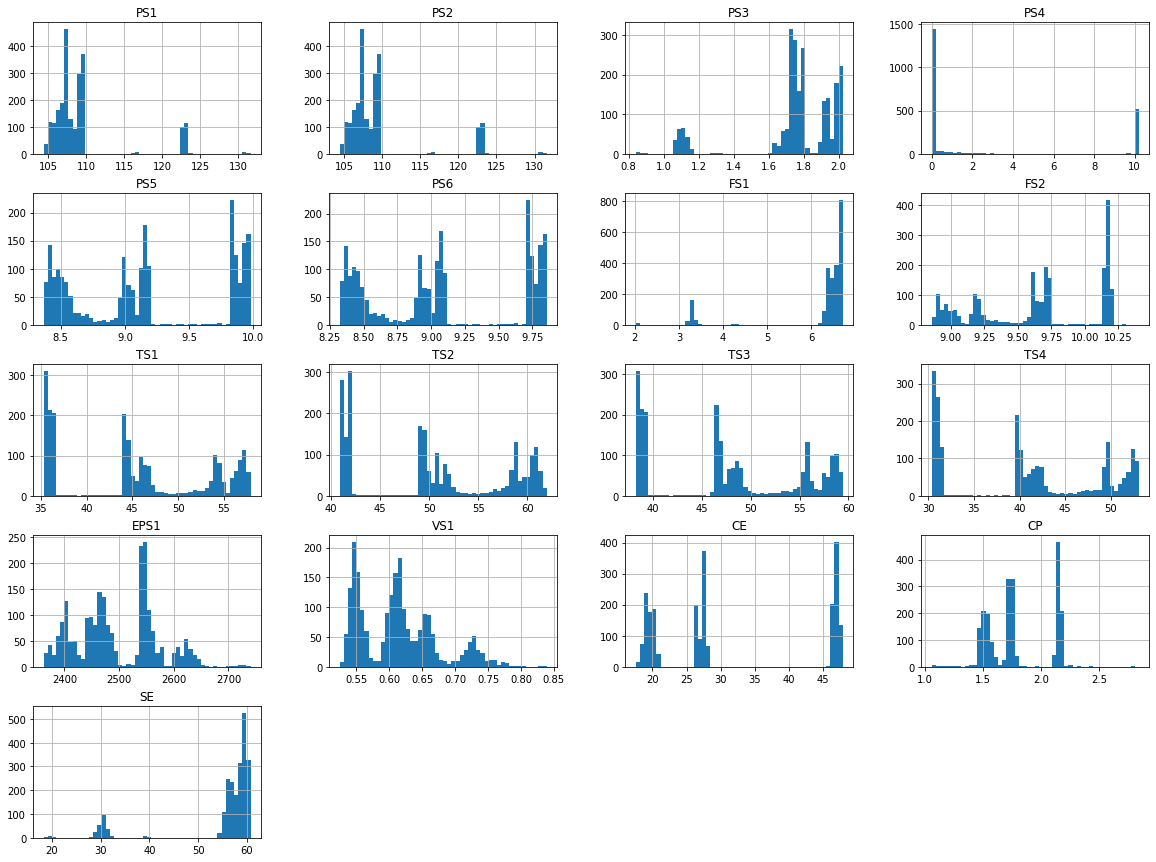

In [ ]:
X.hist(bins=50, figsize=(20, 15))

In [ ]:
y = pd.concat([y_coolerCondition, y_valveCondition, y_pumpLeak, y_hydraulicAcc, y_stableFlag], axis=1)

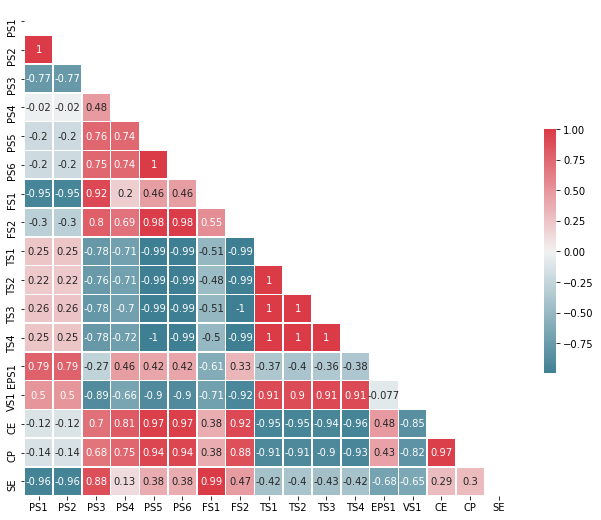

In [ ]:
corr_matrix = X.corr()

#plot heat map for correlation matrix (from https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'PCA explained variance vs. n componets')

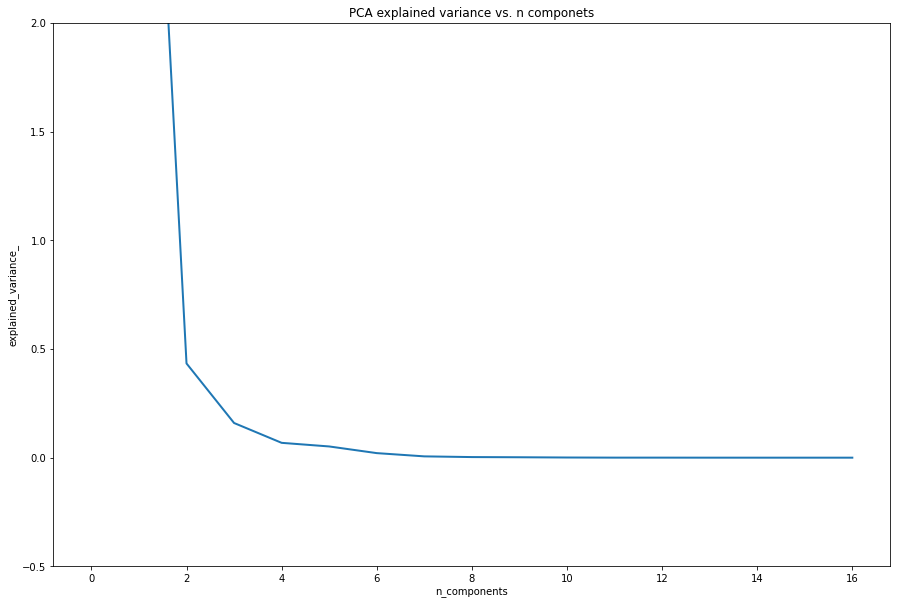

In [ ]:
#normalize the X values
X_normalize = pd.DataFrame(StandardScaler().fit_transform(X))

#apply PCA to visulaize the data in cluster
from sklearn.decomposition import PCA
#find explained variance and n_components

pca = PCA()
pca.fit(X_normalize)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.ylim(-0.5, 2)
plt.title('PCA explained variance vs. n componets')

(2205, 17)
(2205, 2)


Text(0.5, 1.0, 'Clustering of data when PCA dimension =2')

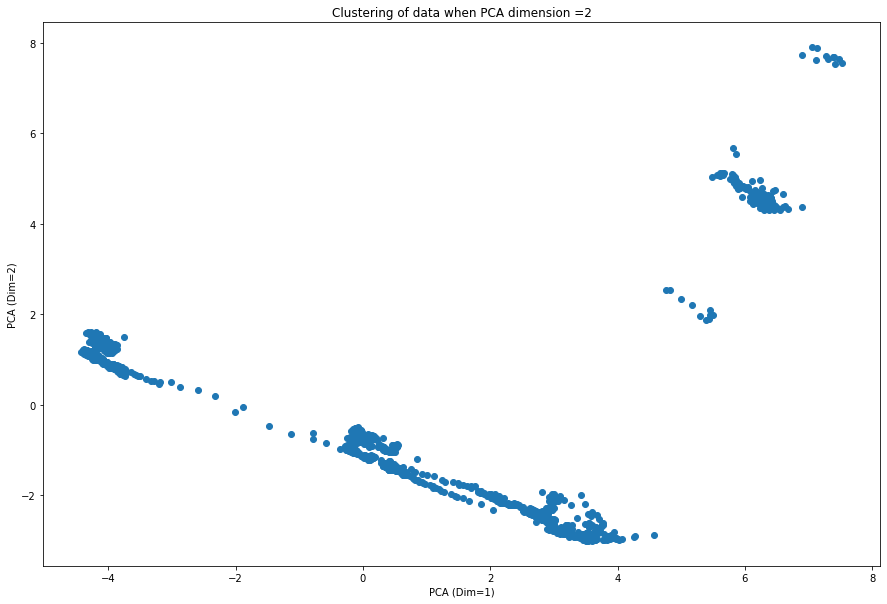

In [ ]:
#observe distribution when n_componets =2
pca_2 = PCA(2)
projected = pca_2.fit_transform(X_normalize)
print(X.shape)
print(projected.shape)
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:,1])
plt.xlabel('PCA (Dim=1)')
plt.ylabel('PCA (Dim=2)')
plt.title('Clustering of data when PCA dimension =2')

In [ ]:
def predict_pump_performance(X, y, predictType):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
    
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=24)
    
    #we will use xgboost to do the classification
    seed= 24
    xgb1 = xgb.sklearn.XGBClassifier(
            learning_rate =0.1,
             n_estimators=100,
             max_depth=5,
             min_child_weight=11,
             gamma=0.1,
             subsample=0.8,
             colsample_bytree=0.7,
             objective='multi:softprob',
             n_jobs=-1,
             scale_pos_weight=1,
             seed=seed)
    
    xgb1.fit(X_train, y_train)
    
    y_pred= xgb1.predict(X_val)
    
    #confusion matrix and classification report
    
    cm = confusion_matrix(y_val, y_pred)
    
    print(classification_report(y_val, y_pred))
    
    
    fig, ax = plt.subplots(figsize = (15, 10))
    ind = np.arange(17)
    width = 0.15
    feature_importtance = xgb1.feature_importances_
    rect1 = ax.bar(ind+width, feature_importtance)
    ax.set_xticks(ind+width/2)
    ax.set_xticklabels(('PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'FS1', 'FS2', 'TS1', 'TS2', 'TS3', 'TS4', 'P1', 'VS1', 'CE1', 'CP1', 'SE1'))
    ax.set_ylabel('Importance')
    ax.set_xlabel('Measurements')
    ax.set_title('Relative Imporatnce of various measurements to predict ' + predictType)
    #plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           3       1.00      1.00      1.00        82
          20       1.00      1.00      1.00        70
         100       1.00      1.00      1.00        69

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



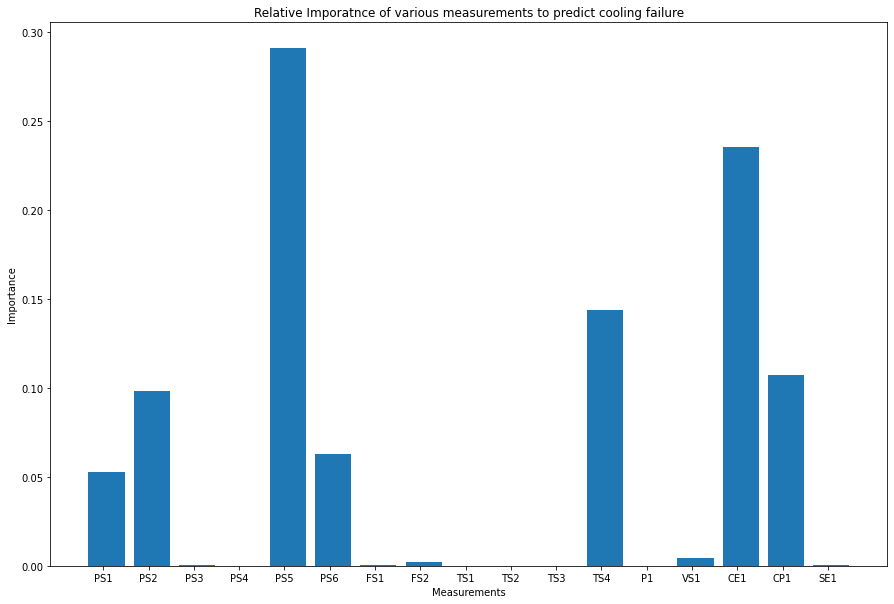

In [ ]:
predict_pump_performance(X_normalize, y_coolerCondition, 'cooling failure')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          73       0.90      0.97      0.94        39
          80       0.97      0.90      0.94        41
          90       0.84      0.68      0.75        31
         100       0.92      0.97      0.95       110

    accuracy                           0.92       221
   macro avg       0.91      0.88      0.89       221
weighted avg       0.92      0.92      0.92       221



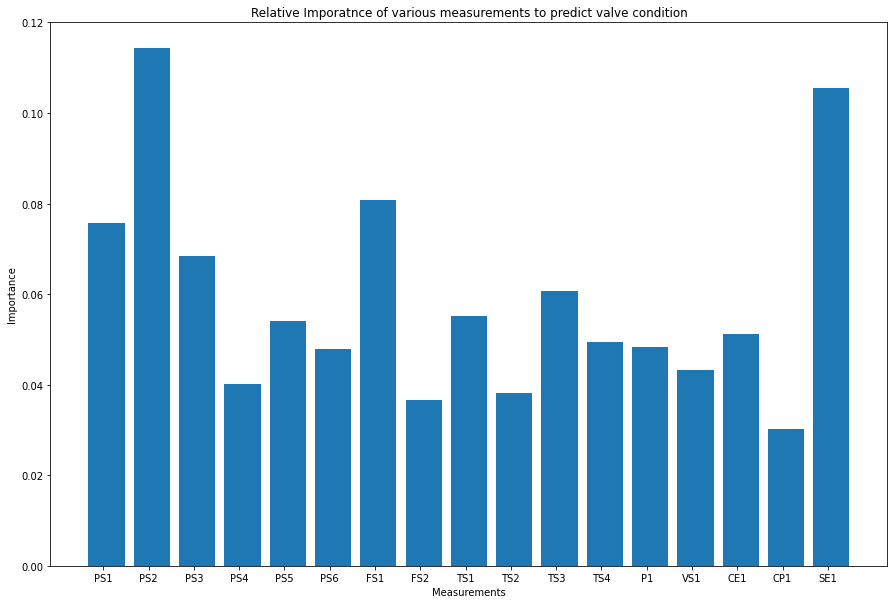

In [ ]:
predict_pump_performance(X_normalize, y_valveCondition, 'valve condition')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.96      0.98      0.97        54
           2       0.98      0.98      0.98        42

    accuracy                           0.99       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.99      0.99      0.99       221



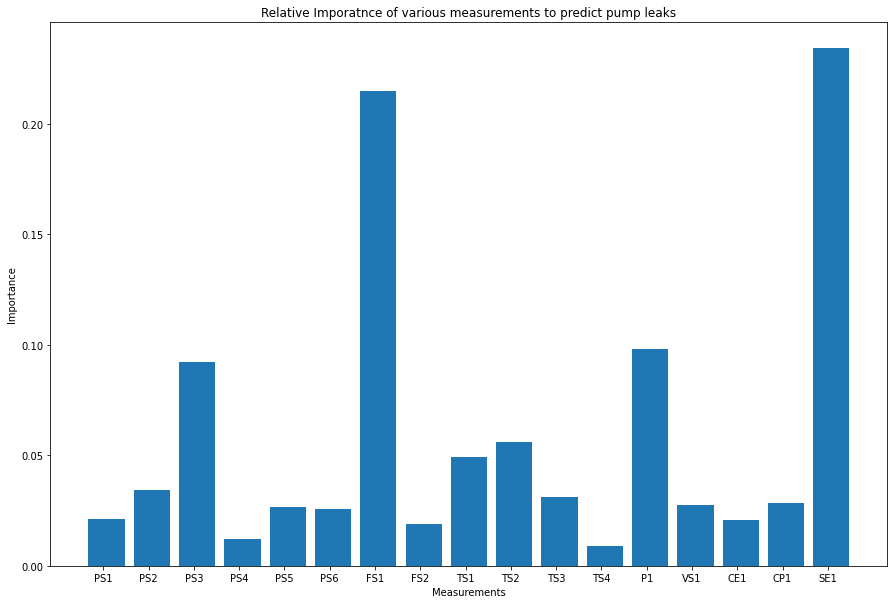

In [ ]:
predict_pump_performance(X_normalize, y_pumpLeak, 'pump leaks')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          90       1.00      0.94      0.97        78
         100       0.92      0.92      0.92        38
         115       0.88      1.00      0.94        36
         130       1.00      1.00      1.00        69

    accuracy                           0.96       221
   macro avg       0.95      0.96      0.96       221
weighted avg       0.97      0.96      0.96       221



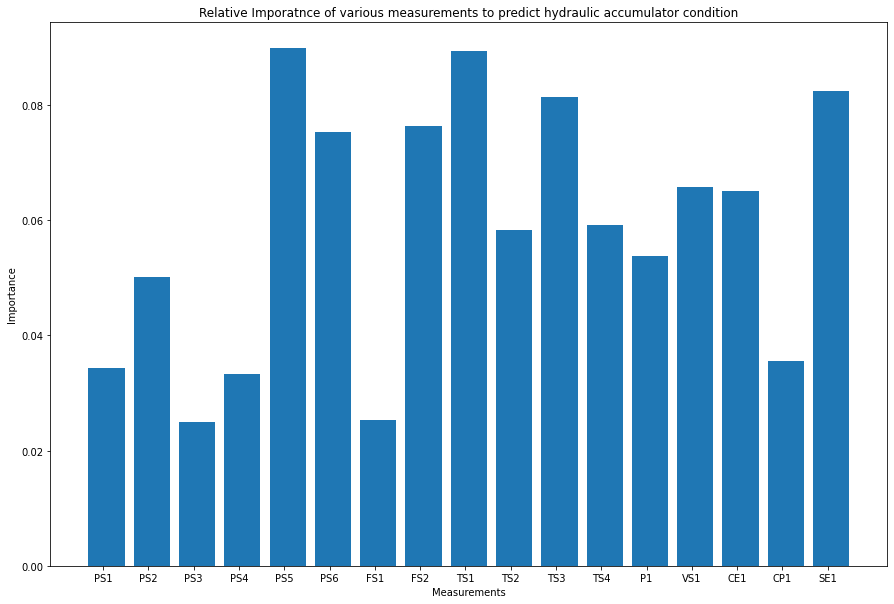

In [ ]:
predict_pump_performance(X_normalize, y_hydraulicAcc, 'hydraulic accumulator condition')

xgboost predicts various pump failure conditions, with a very high level of 
accuracy (F1 score > 0.94 in all cases and > 0.99 in 2 cases)

In [ ]:
y.head()

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
